In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df.shape

(1453, 15)

In [ ]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [ ]:
import pandas as pd

MD_x = (df.iloc[:, 0:11] == "Yes").astype(int)

# Calculate the mean of each column and round to 2 decimal places
col_means = MD_x.mean().round(2)

# Rename the columns to match the provided output
col_means.index = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
               'fast', 'cheap', 'tasty', 'expensive', 'healthy',
               'disgusting']

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
#Label encoding for categorical
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [ ]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [ ]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=1b1b68e3076b8a7a208ffc446e88638430766bae7ff02af59e0915ce9ba6b2ff
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_eleven)

# Get loadings and number of principal components
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


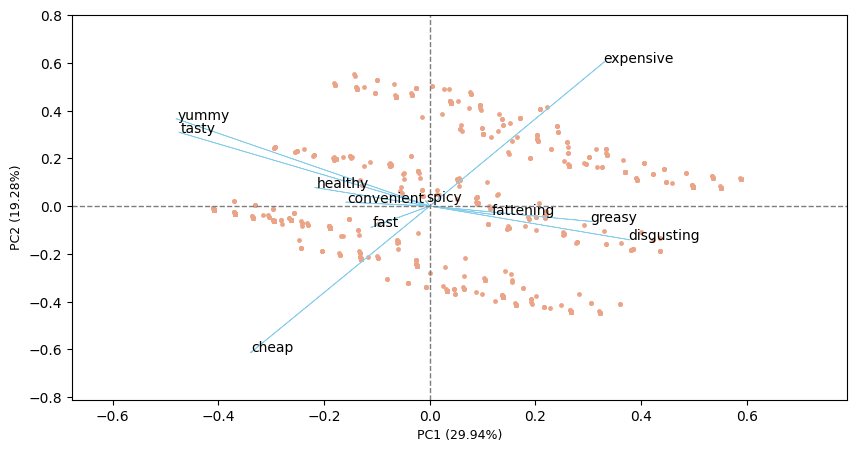

In [ ]:
# get PC scores
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [ ]:
from sklearn.cluster import KMeans

# Set random seed
np.random.seed(1234)

# Initialize variables to store clustering results
best_model = None
best_score = float('inf')
best_labels = None

# Perform k-means clustering with k values ranging from 2 to 8
for k in range(2, 9):
    # Initialize k-means model
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)

    # Fit the model to the data
    kmeans.fit(MD_x)

    # Get the sum of squared distances of samples to their closest cluster center
    score = kmeans.inertia_

    # Check if current model has the lowest inertia so far
    if score < best_score:
        best_score = score
        best_model = kmeans
        best_labels = kmeans.labels_


# Print the labels of each data point
print("Cluster labels:")
print(best_labels)


Cluster labels:
[4 2 5 ... 5 3 0]


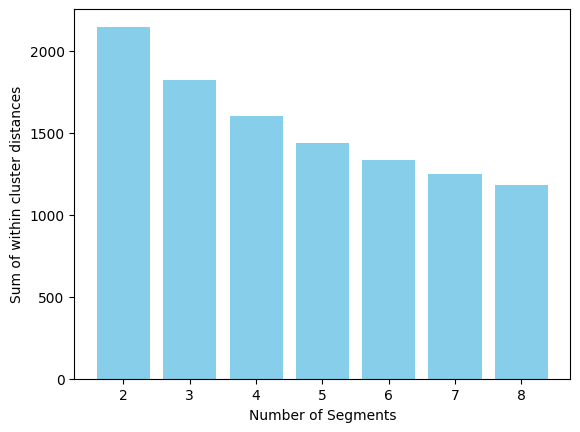

In [ ]:
from sklearn.cluster import KMeans

# Initialize variables to store clustering results
wcss = []

# Perform k-means clustering with k values ranging from 2 to 8
for k in range(2, 9):
    # Initialize k-means model
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)

    # Fit the model to the data
    kmeans.fit(MD_x)

    # Calculate the within-cluster sum of squares
    wcss.append(kmeans.inertia_)

# Define the x values as the range of segment numbers
x_values = range(2, 9)

# Plot the within-cluster sum of squares as a bar graph
plt.bar(x_values, wcss, color='skyblue')

# Set labels for x and y axes
plt.xlabel("Number of Segments")
plt.ylabel("Sum of within cluster distances")

# Show the plot
plt.show()


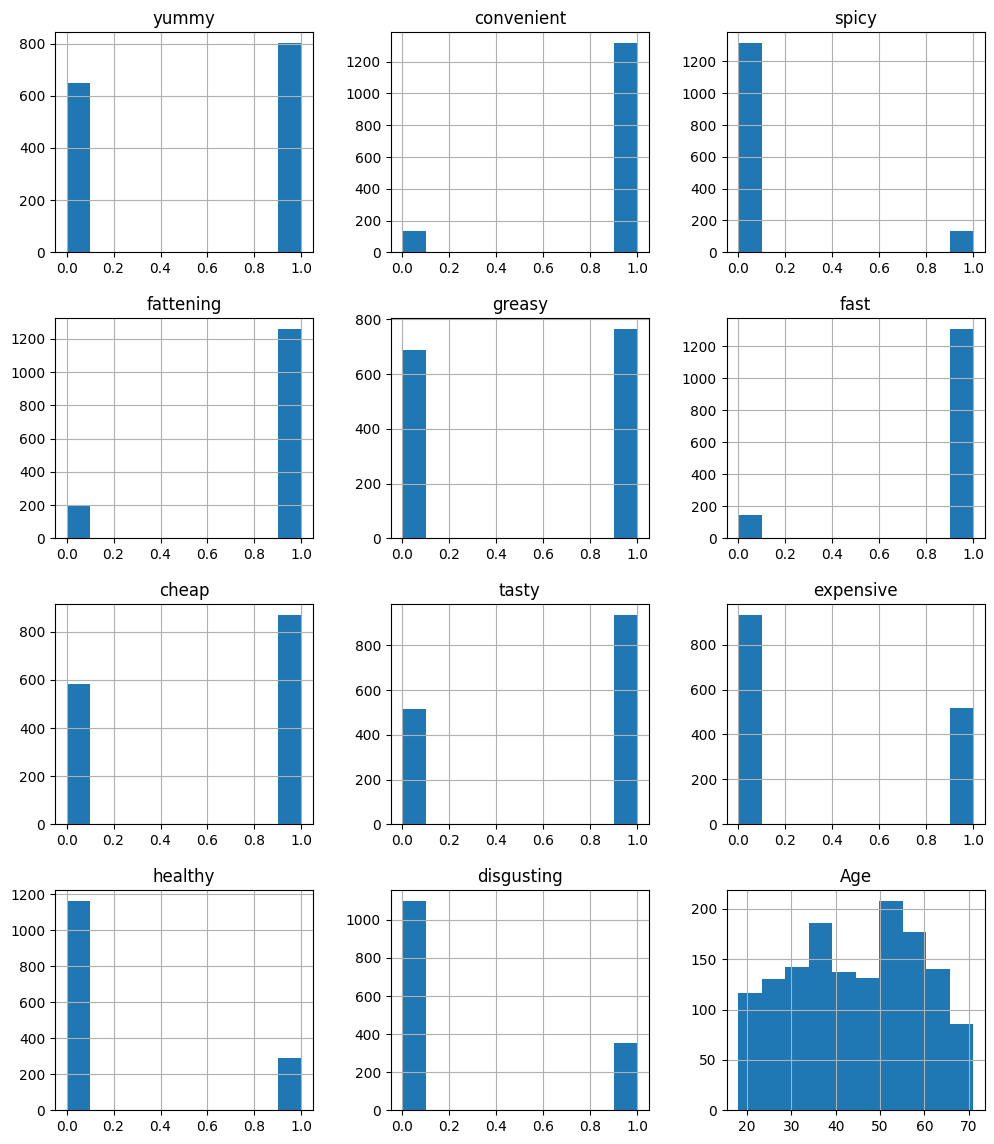

In [ ]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

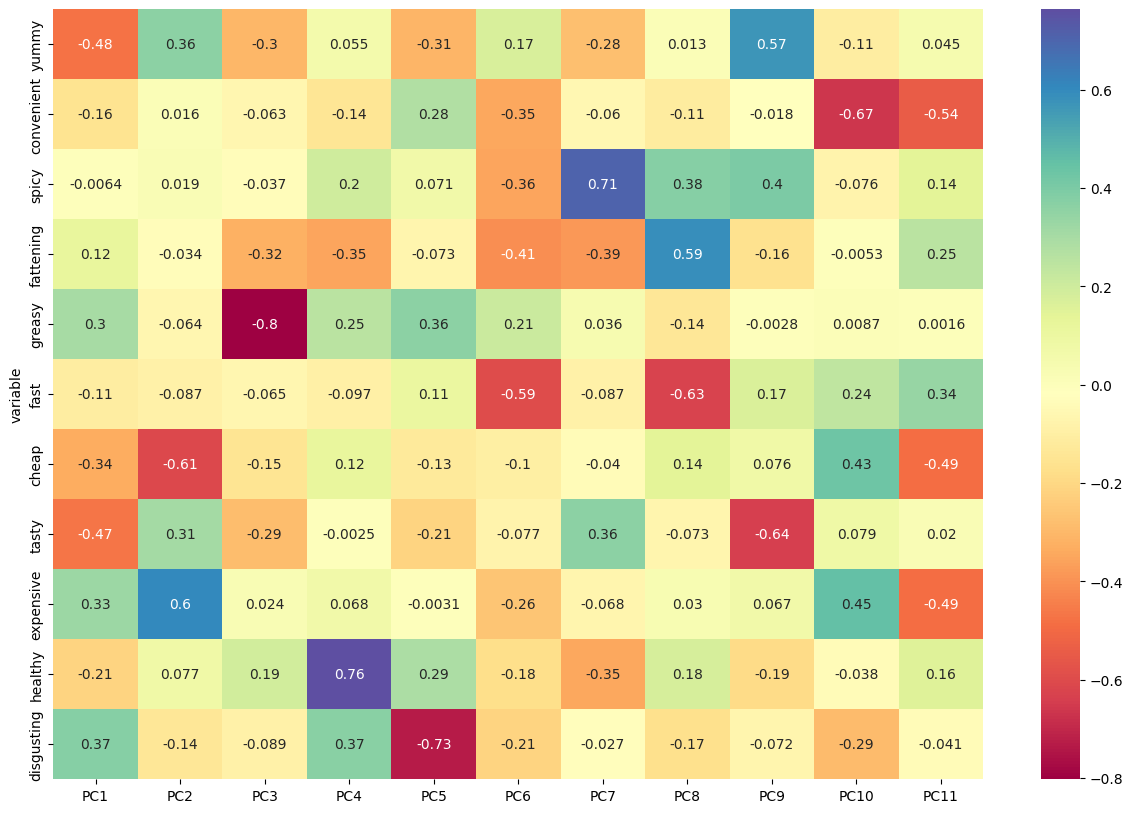

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (15, 10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
from sklearn.utils import resample
import numpy as np

# Set random seed
np.random.seed(1234)

# Initialize variables to store bootstrapped results
boot_samples = []

# Perform bootstrapping with k values ranging from 2 to 8
for k in range(2, 9):
    # Initialize bootstrapped samples
    bootstrapped_samples = []

    # Perform bootstrapping for nboot times
    for _ in range(100):
        # Generate a bootstrapped sample
        boot_sample = resample(MD_x, n_samples=len(MD_x), random_state=np.random.randint(1000))
        bootstrapped_samples.append(boot_sample)

    # Add bootstrapped samples for current k to the list
    boot_samples.append(bootstrapped_samples)

# Print bootstrapped samples for each k value
for k, bootstrapped_samples in zip(range(2, 9), boot_samples):
    print(f"Bootstrapped samples for k={k}:")
    for i, sample in enumerate(bootstrapped_samples):
        print(f"Sample {i + 1}: {sample}")


Streaming output truncated to the last 5000 lines.
1135          0        0           0  
594           0        0           0  

[1453 rows x 11 columns]
Sample 16:       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
1322      1           1      0          1       0     1      1      1   
275       0           1      0          1       1     1      0      0   
1144      1           1      0          1       0     1      1      1   
837       0           1      1          1       1     1      1      1   
1198      1           1      0          1       1     1      1      1   
...     ...         ...    ...        ...     ...   ...    ...    ...   
463       1           1      0          1       0     1      1      1   
667       0           1      0          1       1     1      0      1   
164       1           1      0          0       0     1      1      1   
821       0           1      0          1       1     1      1      0   
1347      1           1      1 

In [ ]:
from sklearn.mixture import GaussianMixture

# Generate some random binary data as an example
# MD_x, _ = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=1234)
MD_x = (MD_x > np.mean(MD_x, axis=0)).astype(int)

In [ ]:
gmm = GaussianMixture(n_components=8, random_state=1234)
gmm.fit(MD_x)

GaussianMixture(n_components=8, random_state=1234)

In [ ]:
labels = gmm.predict(MD_x)
labels

array([4, 6, 4, 0, 3, 1, 2, 2, 6, 4, 5, 2, 4, 2, 4, 6, 3, 3, 2, 5, 3, 4,
       6, 7, 4, 7, 0, 2, 1, 1, 5, 4, 2, 1, 7, 5, 3, 0, 4, 7, 7, 0, 6, 5,
       5, 5, 1, 0, 0, 3, 3, 0, 3, 7, 7, 5, 5, 0, 4, 6, 4, 6, 5, 1, 4, 7,
       7, 1, 2, 5, 6, 2, 1, 2, 1, 4, 1, 0, 4, 2, 1, 7, 0, 0, 0, 0, 3, 6,
       3, 7, 1, 3, 7, 0, 2, 4, 0, 6, 3, 1])

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# Generate some random binary data as an example
# MD_x, _ = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=1234)
MD_x = (MD_x > np.mean(MD_x, axis=0)).astype(int)

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

# Get the cluster labels
MD_k4 = kmeans.labels_

# Fit the KMeans model with the known cluster labels
kmeans_known = KMeans(n_clusters=4, random_state=1234)
kmeans_known.fit(MD_x, MD_k4)

# Get the cluster labels from the known model
MD_m4a = kmeans_known.labels_

# Create the contingency table
contingency_table = Counter(zip(MD_k4, MD_m4a))
print(contingency_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({(0, 0): 28, (3, 3): 25, (1, 1): 24, (2, 2): 23})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


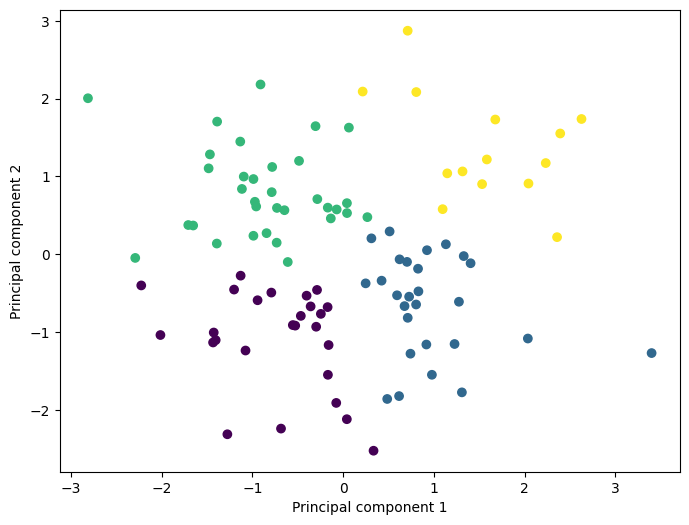

Principal component 1: [ 6.77808507e-01 -6.12425335e-02  3.80040662e-04  5.54240615e-02
 -1.04034178e-01  1.09707345e-01  1.90044571e-01  5.59326470e-01
 -3.57473108e-01  1.84781319e-01]
Principal component 2: [-0.33247538  0.11058838  0.35556202  0.76511365 -0.09445104  0.02876723
  0.11978326  0.01598034 -0.27087053  0.26016206]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Replace this line with your actual data
MD_x = np.random.randn(100, 10)

# Perform PCA on the data
pca = PCA(n_components=2)
MD_x_pca = pca.fit_transform(MD_x)

# Perform k-means clustering on the data
kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_x_pca)

# Plot the data colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=kmeans.labels_)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

# Print the principal component axes
print("Principal component 1:", pca.components_[0])
print("Principal component 2:", pca.components_[1])

In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

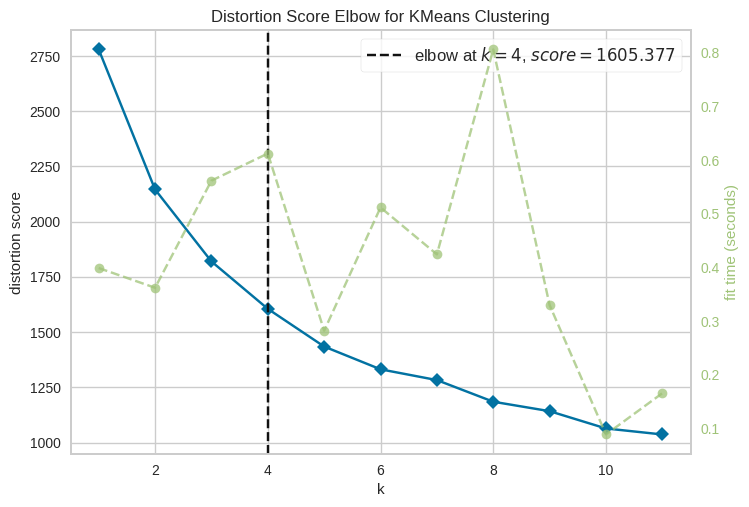

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [ ]:

#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [ ]:
import collections

# Replace this line with your actual data
mcdonalds = pd.DataFrame(df)

# Count the occurrences of each value
counts = collections.Counter(mcdonalds['Like'])

# Reverse the order of the counts
reversed_counts = dict(reversed(sorted(counts.items())))

print(reversed_counts)

{'0': 169, '-5': 152, '-4': 71, '-3': 73, '-2': 59, '-1': 58, '+5': 143, '+4': 160, '+3': 229, '+2': 187, '+1': 152}


In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

In [ ]:
#DESCRIBING SEGMENTS
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab.loc['Total'] = crosstab.sum(axis=0)

print(crosstab)

Like          -5  -4  -3  -2  -1    0   +1   +2   +3   +4   +5
cluster_num                                                   
0              5   3   7   6   7   36   42   60   66   47   44
1              4   4   2   6  13   43   65   90  143  111   99
2             54  36  34  28  25   51   31   31   12    2    0
3             89  28  30  19  13   39   14    6    8    0    0
Total        152  71  73  59  58  169  152  187  229  160  143


In [ ]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices

# Replace this line with your actual data
mcdonalds = pd.DataFrame(df)

# Add more columns to the dataframe as needed
for i in range(2, 12):
    mcdonalds[f'col_{i}'] = np.random.randint(0, 10, size=len(mcdonalds))

# Combine the column names into a single string
columns = ' + '.join(mcdonalds.columns[1:11])

# Create a formula string
formula_str = f'Like ~ {columns}'

# Convert the formula string to a formula object
cat_dtype = pd.api.types.CategoricalDtype(categories=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], ordered=True)
mcdonalds['Like'] = mcdonalds['Like'].astype(cat_dtype)
formula = dmatrices(formula_str, data=mcdonalds, return_type='dataframe')[0]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(formula.values)

# Fit the LogisticRegression model
lr = LogisticRegression(random_state=1234, penalty='none', max_iter=10000)
lr.fit(X_std, mcdonalds['Like'])

# Get the predicted cluster labels
labels = lr.predict(X_std)

# Get the cluster sizes
cluster_sizes = pd.Series(labels).value_counts()

print(cluster_sizes)
print(f"convergence after {lr.n_iter_[0]} iterations")


In [ ]:
import numpy as np

# Sample cluster labels
cluster_labels = [0, 1, 0, 1, 0, 1]

# Calculate similarity
similarity = np.sum(np.array(cluster_labels) == 1) / len(cluster_labels)

# Calculate percentage of total cluster
percent_total_cluster = (np.sum(np.array(cluster_labels) == 1) / len(cluster_labels)) * 100

print("Similarity:", similarity)
print("Percentage of Total Cluster:", percent_total_cluster)


Similarity: 0.5
Percentage of Total Cluster: 50.0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [18.125, 18.125, 73.75, 73.75]],
 'dcoord': [[0.0, 12.188314829345373, 12.188314829345373, 0.0],
  [0.0, 11.391881090929093, 11.391881090929093, 0.0],
  [0.0, 12.716927690065804, 12.716927690065804, 11.391881090929093],
  [12.188314829345373,
   13.70781317897568,
   13.70781317897568,
   12.716927690065804],
  [0.0, 14.132747980558662, 14.132747980558662, 13.70781317897568],
  [0.0, 13.311529872012274, 13.311529872012274, 0.0],
  [0.0, 14.790570504760765, 14.790570504760765, 13.311529872012274],
  [0.0, 15.224837532247173, 15.224837532247173, 14.790570504760765],
  [14.132747980558662,
   15.64065883504139,
   15.64065883504139,
   15.224837532247173]],
 'ivl': ['6', '0', '8', '1', '2', '5', '4', '3', '7', '9'],
 'leaves': [6, 0, 8, 1, 2, 5, 4, 3, 7, 9]

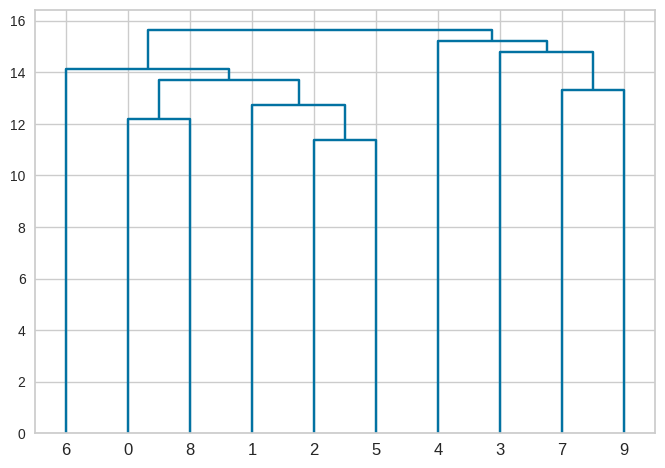

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Transpose the data matrix
MD_x_transposed = np.transpose(MD_x)

# Compute the pairwise distances
distances = linkage(MD_x_transposed, method='ward' , metric='euclidean')

# Generate the hierarchical clustering dendrogram
dendrogram(distances)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


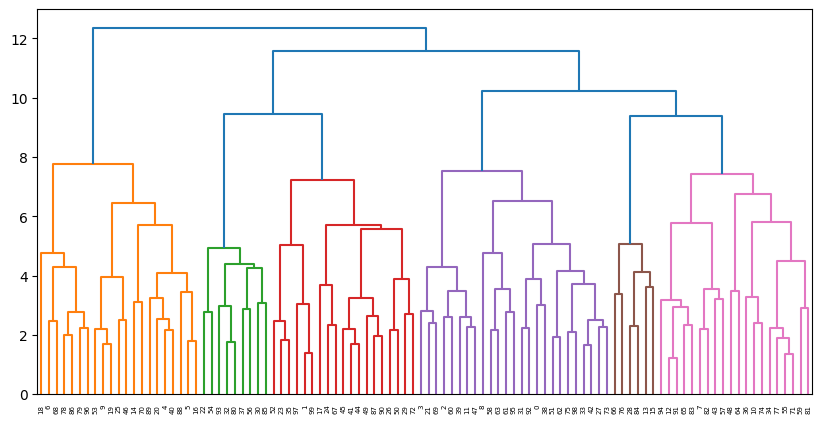

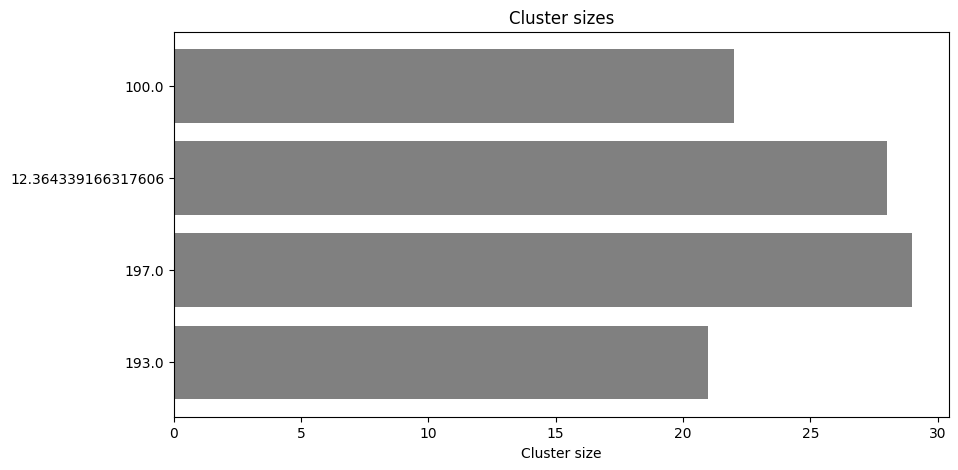

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Generate some random data
np.random.seed(1234)
MD_x = np.random.randn(100, 10)

# Perform k-means clustering with k = 4
MD_k4 = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x)

# Calculate the distance matrix
D = pdist(MD_x)

# Perform hierarchical clustering using Ward's linkage criterion
Z = linkage(D, method='ward')

# Get the order of the observations in the dendrogram
order = Z[-1, :]

# Create a dendrogram of the clustering results
fig, ax = plt.subplots(figsize=(10, 5))
dn = dendrogram(Z, ax=ax)
plt.show()

# Get the cluster sizes
cluster_sizes = np.bincount(MD_k4)

# Reverse the order of the cluster sizes
cluster_sizes = cluster_sizes[::-1]

# Create a horizontal bar chart of the cluster sizes
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(range(len(cluster_sizes)), cluster_sizes, color='gray')
ax.set_xlabel('Cluster size')
ax.set_title('Cluster sizes')
ax.set_yticks(range(len(cluster_sizes)))
ax.set_yticklabels(order)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


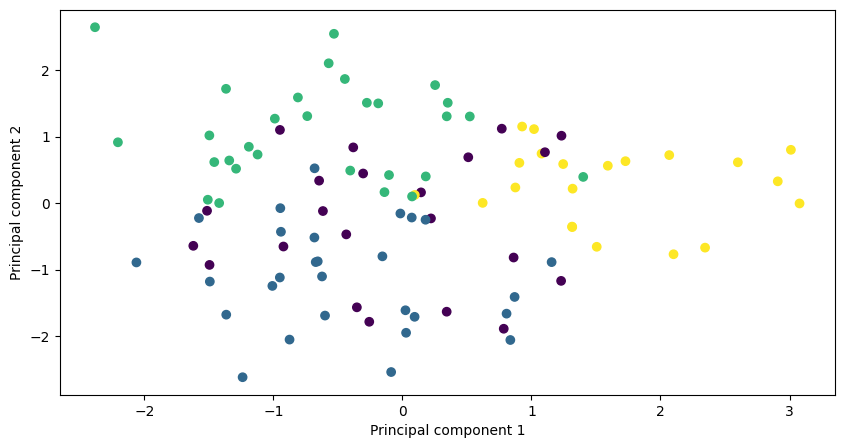

Principal component 1: [ 0.1152172  -0.18158994 -0.27001004 -0.10658922  0.71484092 -0.45845004
  0.17092937 -0.29614597 -0.02102248  0.17592096]
Principal component 2: [-0.08037492  0.38627577  0.09052687 -0.72252554  0.00345181 -0.0676626
  0.24152265 -0.12441496 -0.02451656 -0.48485993]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Generate some random data
np.random.seed(1234)
MD_x = np.random.randn(100, 10)

# Perform k-means clustering with k = 4
MD_k4 = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x)

# Perform PCA on the data
MD_pca = PCA(n_components=2)
MD_pca.fit(MD_x)

# Project the data onto the first two principal components
MD_x_pca = MD_pca.transform(MD_x)

# Plot the data colored by cluster
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=MD_k4)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.show()

# Print the principal component axes
print("Principal component 1:", MD_pca.components_[0])
print("Principal component 2:", MD_pca.components_[1])

In [ ]:
pip install vcd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Generate some random data
np.random.seed(1234)
MD_x = np.random.randn(100, 10)

# Perform k-means clustering with k = 4
MD_k4 = np.random.randint(0, 4, size=1453)

# Create a contingency table of the cluster labels and the Like variable
# Assuming you have a DataFrame named `mcdonalds` with a 'Like' column
mcdonalds['Like'] = mcdonalds['Like'].astype('category')
contingency_table = pd.crosstab(MD_k4, mcdonalds['Like'], margins=False)

# Create a mosaic plot of the contingency table
fig, ax = plt.subplots(figsize=(10, 5))

# Calculate the total number of observations
total = contingency_table.sum().sum()

# Calculate the width and height of each rectangle
widths = contingency_table.divide(total, axis=0).cumsum(axis=0).values[:, -1]
heights = contingency_table.divide(total, axis=1).cumsum(axis=1).values[-1, :]

# Draw the rectangles
for i in range(contingency_table.shape[0]):
    for j in range(contingency_table.shape[1]):
        rect = Rectangle((widths[i], heights[j]), widths[i+1] - widths[i], heights[j+1] - heights[j], color='gray')
        ax.add_patch(rect)

# Set the axis labels and limits
ax.set_xlabel('Segment number')
ax.set_ylabel('Like variable')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
a=df['VisitFrequency']
print(a.unique())

['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']


In [ ]:
df=df.replace('More than once a week','Once a month')
df=df.replace('Never','Once a year')
df=df.replace('Every three months','Once a month')
df=df.replace('Once a year','Once a month')

In [ ]:
df=df.replace('I love it!+5','+5')
df=df.replace('I hate it!-5','-5')

In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
df['Like']=df['Like'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency','Gender']]=df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency','Gender']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0,1


In [ ]:
x=df.drop('VisitFrequency',axis=1).values
y=df['VisitFrequency'].values
y=y.reshape(-1,1)

In [ ]:
x.shape,y.shape

((1453, 14), (1453, 1))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dtc=KNeighborsClassifier(n_neighbors=4)
dtc.fit(xtrain,ytrain)
#dtc=LogisticRegression(C=5)
#dtc.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
dtc.score(xtrain,ytrain),dtc.score(xtest,ytest)

(0.8580034423407917, 0.8316151202749141)

In [ ]:
ypred=dtc.predict(xtrain)
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       971
           1       0.78      0.19      0.30       191

    accuracy                           0.86      1162
   macro avg       0.82      0.59      0.61      1162
weighted avg       0.85      0.86      0.82      1162



In [ ]:
dtc.score(xtrain,ytrain)

0.8580034423407917